In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [5]:
len(array_Xtest)

200316

In [6]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [7]:
len(array_Ytest)

200316

In [8]:
model_Gen = keras.models.load_model('modelos/model_Gen_15min.h5')

In [21]:
from pickle import load
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

In [10]:
len(array_Xtest)

200316

In [11]:
array_Xtest

array([[[ 0.11521739,  0.00217391,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.11304348, -0.00217391,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.10217391, -0.01086957,  0.47826087,  0.2       ,
          0.5       ],
        ...,
        [ 0.22391304, -0.00217391,  0.73913043,  0.6       ,
          0.5       ],
        [ 0.23478261,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ],
        [ 0.24565217,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ]],

       [[ 0.11304348, -0.00217391,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.10217391, -0.01086957,  0.47826087,  0.2       ,
          0.5       ],
        [ 0.09130435, -0.01086957,  0.47826087,  0.2       ,
          0.5       ],
        ...,
        [ 0.23478261,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ],
        [ 0.24565217,  0.01086957,  0.7826087 ,  0.6       ,
          0.5       ],
        [ 0.24782609,  0.00217391,  0.7826087 , 

In [12]:
len(array_Ytest)

200316

# Predicción a 30 min

In [56]:
lenHorizonte=2
horizonte=[]
horizonte_array_Ytest=[]
for i in range(lenHorizonte):
    horizonte.append(array_Xtest[i]) 
    horizonte_array_Ytest.append(array_Ytest[i]) 
horizonte=np.reshape(horizonte, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))
len(horizonte)

2

In [57]:
horizonte.shape

(2, 30, 6)

1/1 [==============================] - 0s 58ms/step


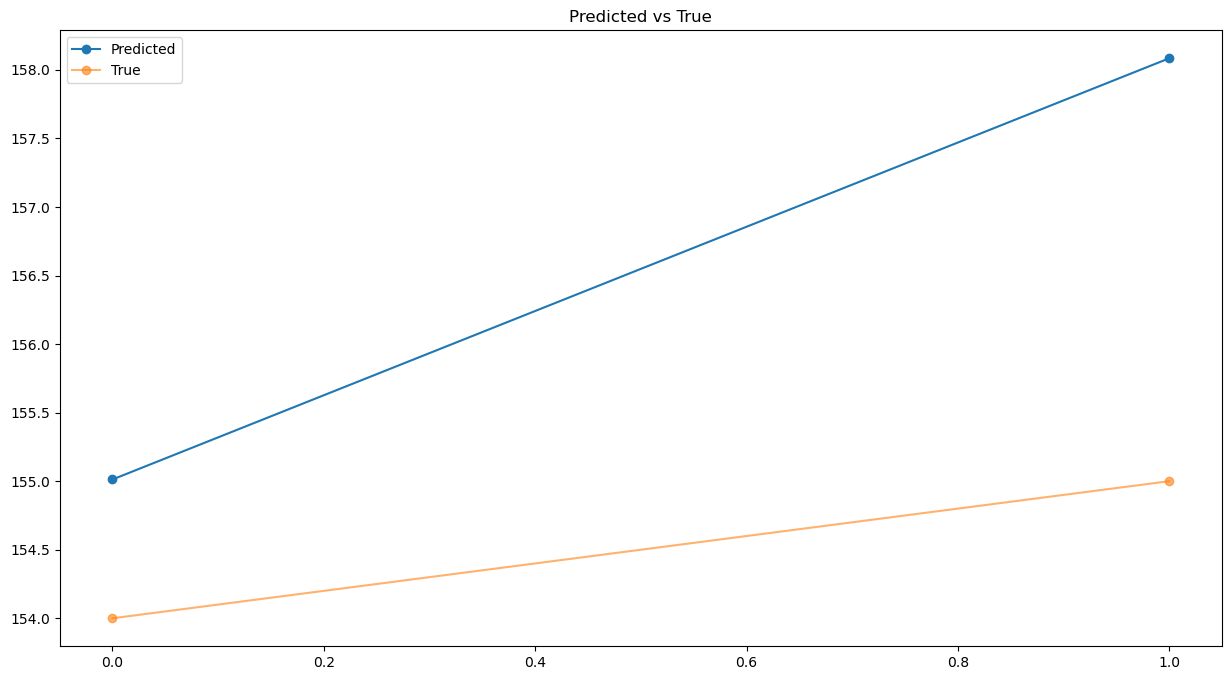

{'mae': 2.048553466796875,
 'mse': 2.2957066442048206,
 'rmse': 5.270268996246159}

In [15]:
yhat=model_utils.predictionOverPrediction(horizonte,model_Gen)

yhat = pd.DataFrame(yhat)
horizonte_array_Ytest = pd.DataFrame(horizonte_array_Ytest)

yhat = pd.DataFrame(scalerGlucosa.inverse_transform(yhat))
horizonte_array_Ytest = pd.DataFrame(scalerGlucosa.inverse_transform(horizonte_array_Ytest))

model_utils.plotPredicted(yhat,horizonte_array_Ytest)
model_utils.forecast_accuracy(yhat,horizonte_array_Ytest)

In [17]:
df = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

In [59]:
features=['Glucose level','Yt','hour','pod_id','level_id']

In [60]:
# Generamos train validation and test 
# ratio of training data set (85%, 10% for validation and 5% for testing)
train_share = 0.85
#ration of validation data set (10%)
val_share = 0.95 
lag=30
n_ahead=1


dfGen,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df,features,['LIB193358'],15,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId)


<AxesSubplot:xlabel='Date'>

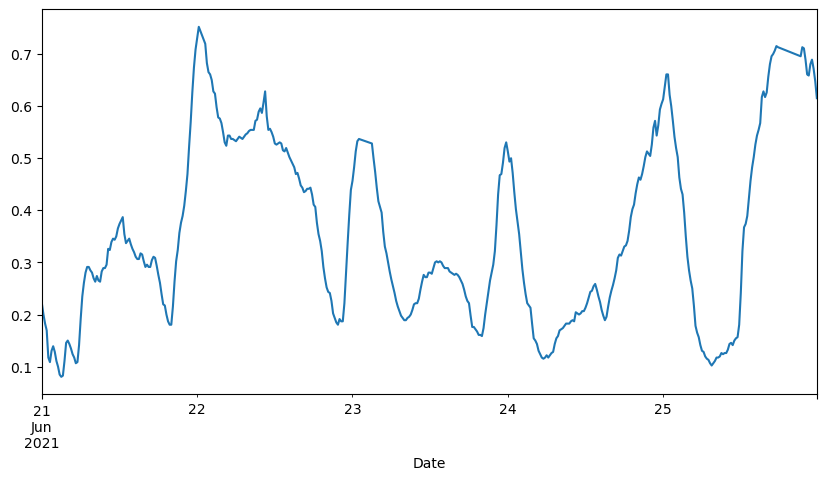

In [61]:
dfGen['Glucose level'].plot(figsize=(10, 5))

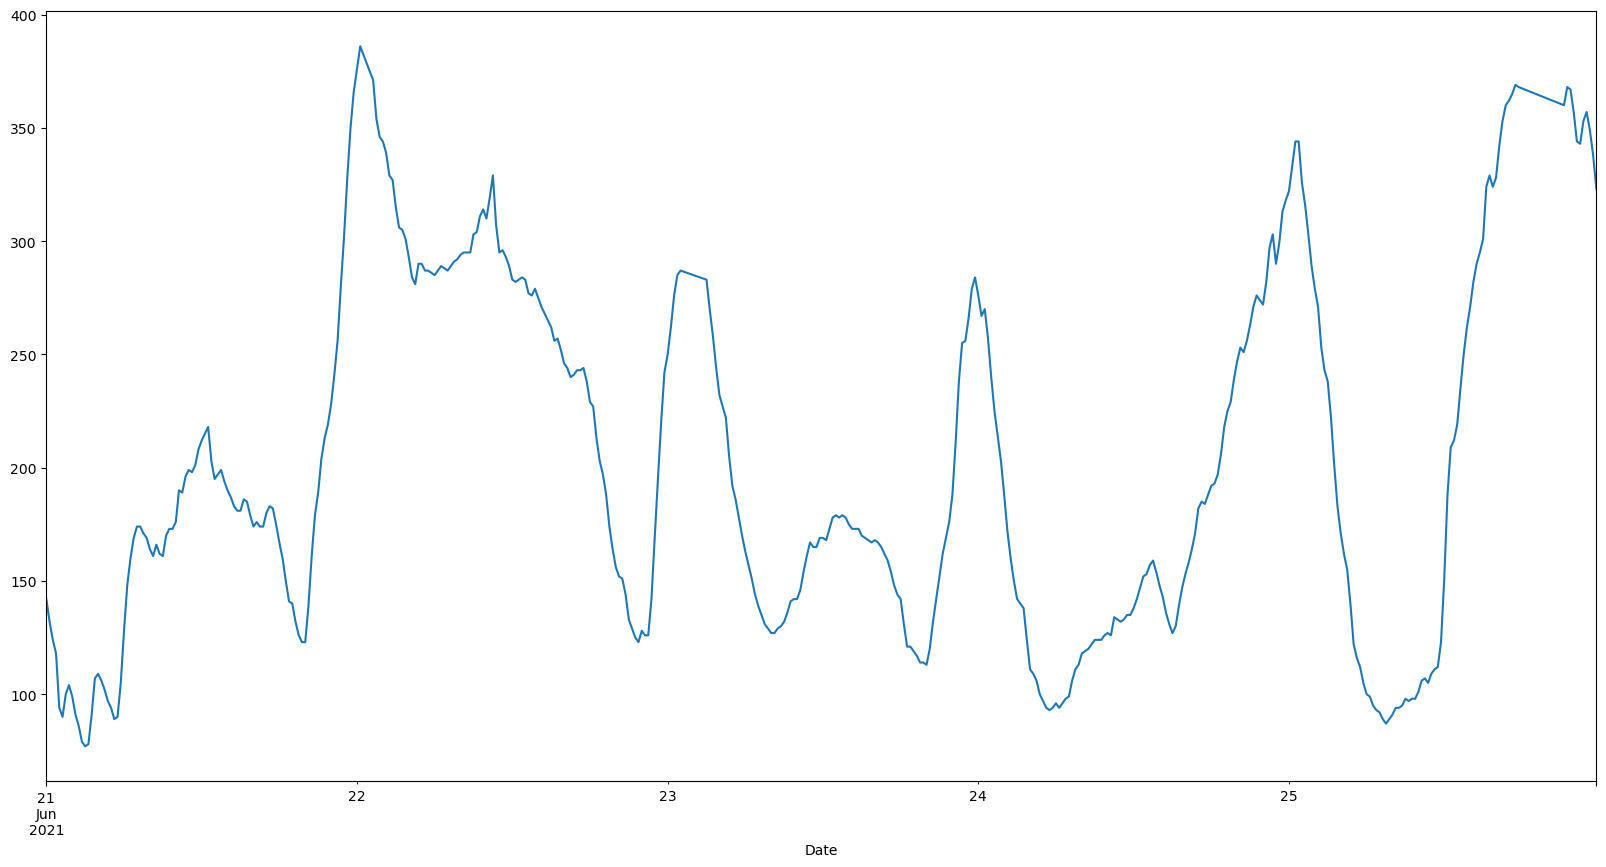

In [38]:
dfGen['Glucose level'] = scalerGlucosa.inverse_transform(dfGen[['Glucose level']].values)
ObjRangeDateStart='2021-6-21';
ObjRangeDateEnd='2021-6-25';
utils.plotRangeDates(dfGen['Glucose level'],ObjRangeDateStart,ObjRangeDateEnd)

In [37]:
dfGen['Glucose level'] = scalerGlucosa.transform(dfGen[['Glucose level']].values) 

In [45]:
df=dfGen.loc[ObjRangeDateStart:ObjRangeDateEnd]
df['ID']='LIB193358'
df['Date']=df.index

In [46]:
df

,Glucose level,Yt,hour,min,pod_id,level_id,ID,Date
Date,,,,,,,,
2021-06-21 00:00:00,142.0,-0.019565,0.000000,0.000000,1.0,0.5,LIB193358,2021-06-21 00:00:00
2021-06-21 00:15:00,132.0,-0.021739,0.000000,0.254237,1.0,0.5,LIB193358,2021-06-21 00:15:00
2021-06-21 00:30:00,124.0,-0.017391,0.000000,0.508475,1.0,0.5,LIB193358,2021-06-21 00:30:00
2021-06-21 00:45:00,118.0,-0.013043,0.000000,0.762712,1.0,0.5,LIB193358,2021-06-21 00:45:00
2021-06-21 01:00:00,94.0,-0.052174,0.043478,0.000000,0.8,0.5,LIB193358,2021-06-21 01:00:00
...,...,...,...,...,...,...,...,...
2021-06-25 22:45:00,353.0,0.021739,0.956522,0.762712,0.8,1.0,LIB193358,2021-06-25 22:45:00
2021-06-25 23:00:00,357.0,0.008696,1.000000,0.000000,0.8,1.0,LIB193358,2021-06-25 23:00:00
2021-06-25 23:15:00,349.0,-0.017391,1.000000,0.254237,0.8,1.0,LIB193358,2021-06-25 23:15:00


In [47]:
dfGen,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df,features,['LIB193358'],15,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId)

In [51]:
len(array_Xtrain)

381

In [52]:
X=array_Xtrain
Y=array_Ytrain

lenHorizonte=2
horizonte=[]
horizonte_array_Ytest=[]
for i in range(lenHorizonte):
    horizonte.append(X[i]) 
    horizonte_array_Ytest.append(Y[i]) 
horizonte=np.reshape(horizonte, (lenHorizonte, X.shape[1],X.shape[2]))
len(horizonte)

2

In [55]:
horizonte.shape

(2, 30, 6)

In [58]:
yhat=model_utils.predictionOverPrediction(horizonte,model_Gen)

yhat = pd.DataFrame(yhat)
horizonte_array_Ytest = pd.DataFrame(horizonte_array_Ytest)

yhat = pd.DataFrame(scalerGlucosa.inverse_transform(yhat))
horizonte_array_Ytest = pd.DataFrame(scalerGlucosa.inverse_transform(horizonte_array_Ytest))

model_utils.plotPredicted(yhat,horizonte_array_Ytest)
model_utils.forecast_accuracy(yhat,horizonte_array_Ytest)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/lstm/TensorArrayUnstack/TensorListFromTensor' defined at (most recent call last):
    File "C:\Users\wm_herrera\Anaconda3_1\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\wm_herrera\Anaconda3_1\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\wm_herrera\AppData\Local\Temp\ipykernel_3984\52047633.py", line 1, in <module>
      yhat=model_utils.predictionOverPrediction(horizonte,model_Gen)
    File "C:\Users\wm_herrera\Desktop\celular\Maestria IA\Tesis\Glucose Tesis\notebooks\codigo\model_utils.py", line 93, in predictionOverPrediction
      current_pred = model.predict(current_batch)[0][0]
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\layers\rnn\base_rnn.py", line 553, in __call__
      return super().__call__(inputs, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\layers\rnn\lstm.py", line 625, in call
      last_output, outputs, states = backend.rnn(
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\backend.py", line 4939, in rnn
      input_ta = tuple(
    File "C:\Users\wm_herrera\Anaconda3_1\lib\site-packages\keras\backend.py", line 4940, in <genexpr>
      ta.unstack(input_)
Node: 'sequential/lstm/TensorArrayUnstack/TensorListFromTensor'
Specified a list with shape [?,5] from a tensor with shape [1,6]
	 [[{{node sequential/lstm/TensorArrayUnstack/TensorListFromTensor}}]] [Op:__inference_predict_function_1010]